# 学生消费行为可视化分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
#提高分辨率
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
import seaborn as sns

In [2]:
data=pd.read_csv('task1_2_1.csv',encoding='gbk')
data.head()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
0,1,180001,男,18国际金融,19762330,117331517.0,20181.0,2019-04-21 18:30:00,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂
1,1,180001,男,18国际金融,19762330,117341866.0,20181.0,2019-04-22 09:40:00,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂
2,1,180001,男,18国际金融,19762330,117154618.0,20181.0,2019-04-10 16:42:00,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂
3,1,180001,男,18国际金融,19762330,117200032.0,20181.0,2019-04-15 11:43:00,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂
4,1,180001,男,18国际金融,19762330,117206146.0,20181.0,2019-04-15 07:50:00,2.5,0.0,50.2,191.0,消费,2.0,236.0,第一食堂


## 1.学生消费行为可视化分析

In [3]:
#计算人均刷卡频次（总刷卡次数/学生总人数）
cost_count=data['消费时间'].count()
student_count=data['校园卡号'].value_counts(dropna=False).count()
avg_cost_count=int(round(cost_count/student_count))
avg_cost_count

74

In [4]:
#计算人均消费额(总消费金额/学生总人数)
cost_sum=data['消费金额'].sum()
avg_cost_money=int(round(cost_sum/student_count))
avg_cost_money

285

## 1.1按不同专业学生消费情况分析

In [5]:
#查看专业和各专业的人数，选择专业人数最多的三个专业进行分析
data['专业名称'].value_counts()

专业名称
18连锁经营        12100
18机械制造        11181
18会计          10055
18宝玉石鉴定        8602
18金融管理         8494
18国际商务         8339
18模具设计         8331
18国贸实务         8201
18软件技术         8166
18商务英语         7452
18工程造价         7131
18旅游管理         6873
18皮具艺术         6792
18电子商务         6754
18审计           6564
18工业机器人        6463
18工业设计         6300
18建筑工程         6279
18电气自动化        6171
18建筑设计         6140
18计算机网络        6110
18工商企管         5763
18投资与理财        5544
18社会工作         5510
18汽车检测         5093
18市场营销         5092
18计算机应用        4546
18国际金融         4351
18艺术设计         4278
18嵌入式技术        4196
18商务日语         4154
18工业工程         3987
18酒店管理         3895
18物流管理         3666
18动漫设计         3520
18首饰设计         3411
18视觉传播         2941
18环境艺术         2853
18产品艺术         2550
18市政工程         1840
18机械制造（学徒）     1391
Name: count, dtype: int64

In [6]:
#18连锁经营，18机械制造，18会计
#因为18机械制造(学徒)会影响筛选，所以需要排除掉
major1 = data['专业名称'].apply(str).str.contains('18连锁经营')
major2 = data['专业名称'].apply(str).str.contains('18机械制造')
major3 = data['专业名称'].apply(str).str.contains('18会计')
major4 = data['专业名称'].apply(str).str.contains('18机械制造（学徒）')
data_new=data[(major1|major2|major3)^major4]
data_new['专业名称'].value_counts()

专业名称
18连锁经营    12100
18机械制造    11181
18会计      10055
Name: count, dtype: int64

### 1.1.1各专业消费基础指标对比

In [7]:
# 计算各专业指标
major_groups = data_new.groupby('专业名称')
avg_freq = major_groups['消费次数'].mean()  # 人均消费频次
avg_money = major_groups['消费金额'].mean()  # 人均消费金额
print(avg_freq)
avg_money

专业名称
18会计      675.278568
18机械制造    774.998122
18连锁经营    683.925537
Name: 消费次数, dtype: float64


专业名称
18会计      3.604844
18机械制造    3.784942
18连锁经营    3.219151
Name: 消费金额, dtype: float64

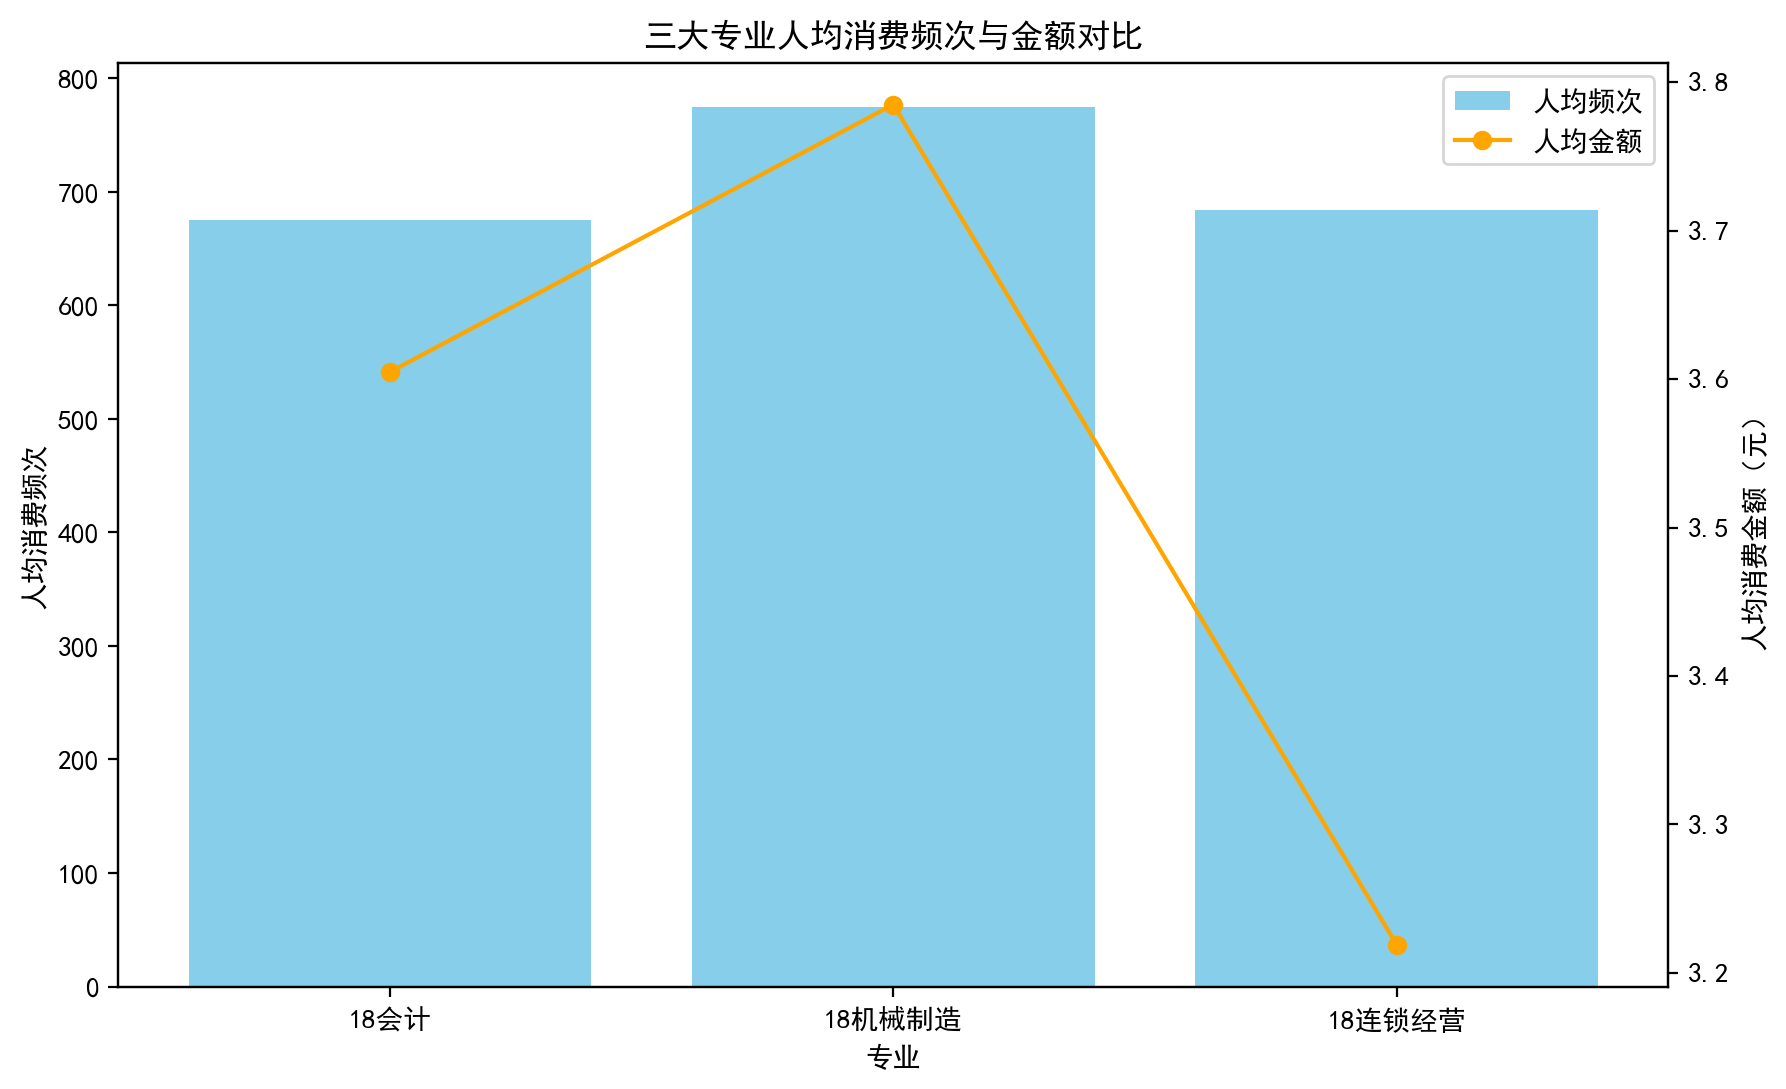

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制柱状图
ax1.bar(avg_freq.index, avg_freq, color='skyblue', label='人均频次')
ax1.set_xlabel("专业")
ax1.set_ylabel('人均消费频次')

# 创建第二个轴
ax2 = ax1.twinx()
ax2.plot(avg_money.index, avg_money, color='orange', marker='o', label='人均金额')
ax2.set_ylabel('人均消费金额（元）')

# 设置标题
plt.title('三大专业人均消费频次与金额对比')

# 设置横轴标签的字体属性
plt.xticks(rotation=45)  # 如果需要旋转标签

# 获取两个轴的图例句柄和标签
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# 合并图例
handles = handles1 + handles2
labels = labels1 + labels2

# 添加图例
plt.legend(handles, labels, loc='upper right')

# 显示图形
plt.show()

18机械制造专业的人频次和人均金额都是最高的，是食堂消费是主力军

18连锁经营的的人均频次是位居第二，但是人均金额远远低于其他专业

###  1.1.2消费地点偏好

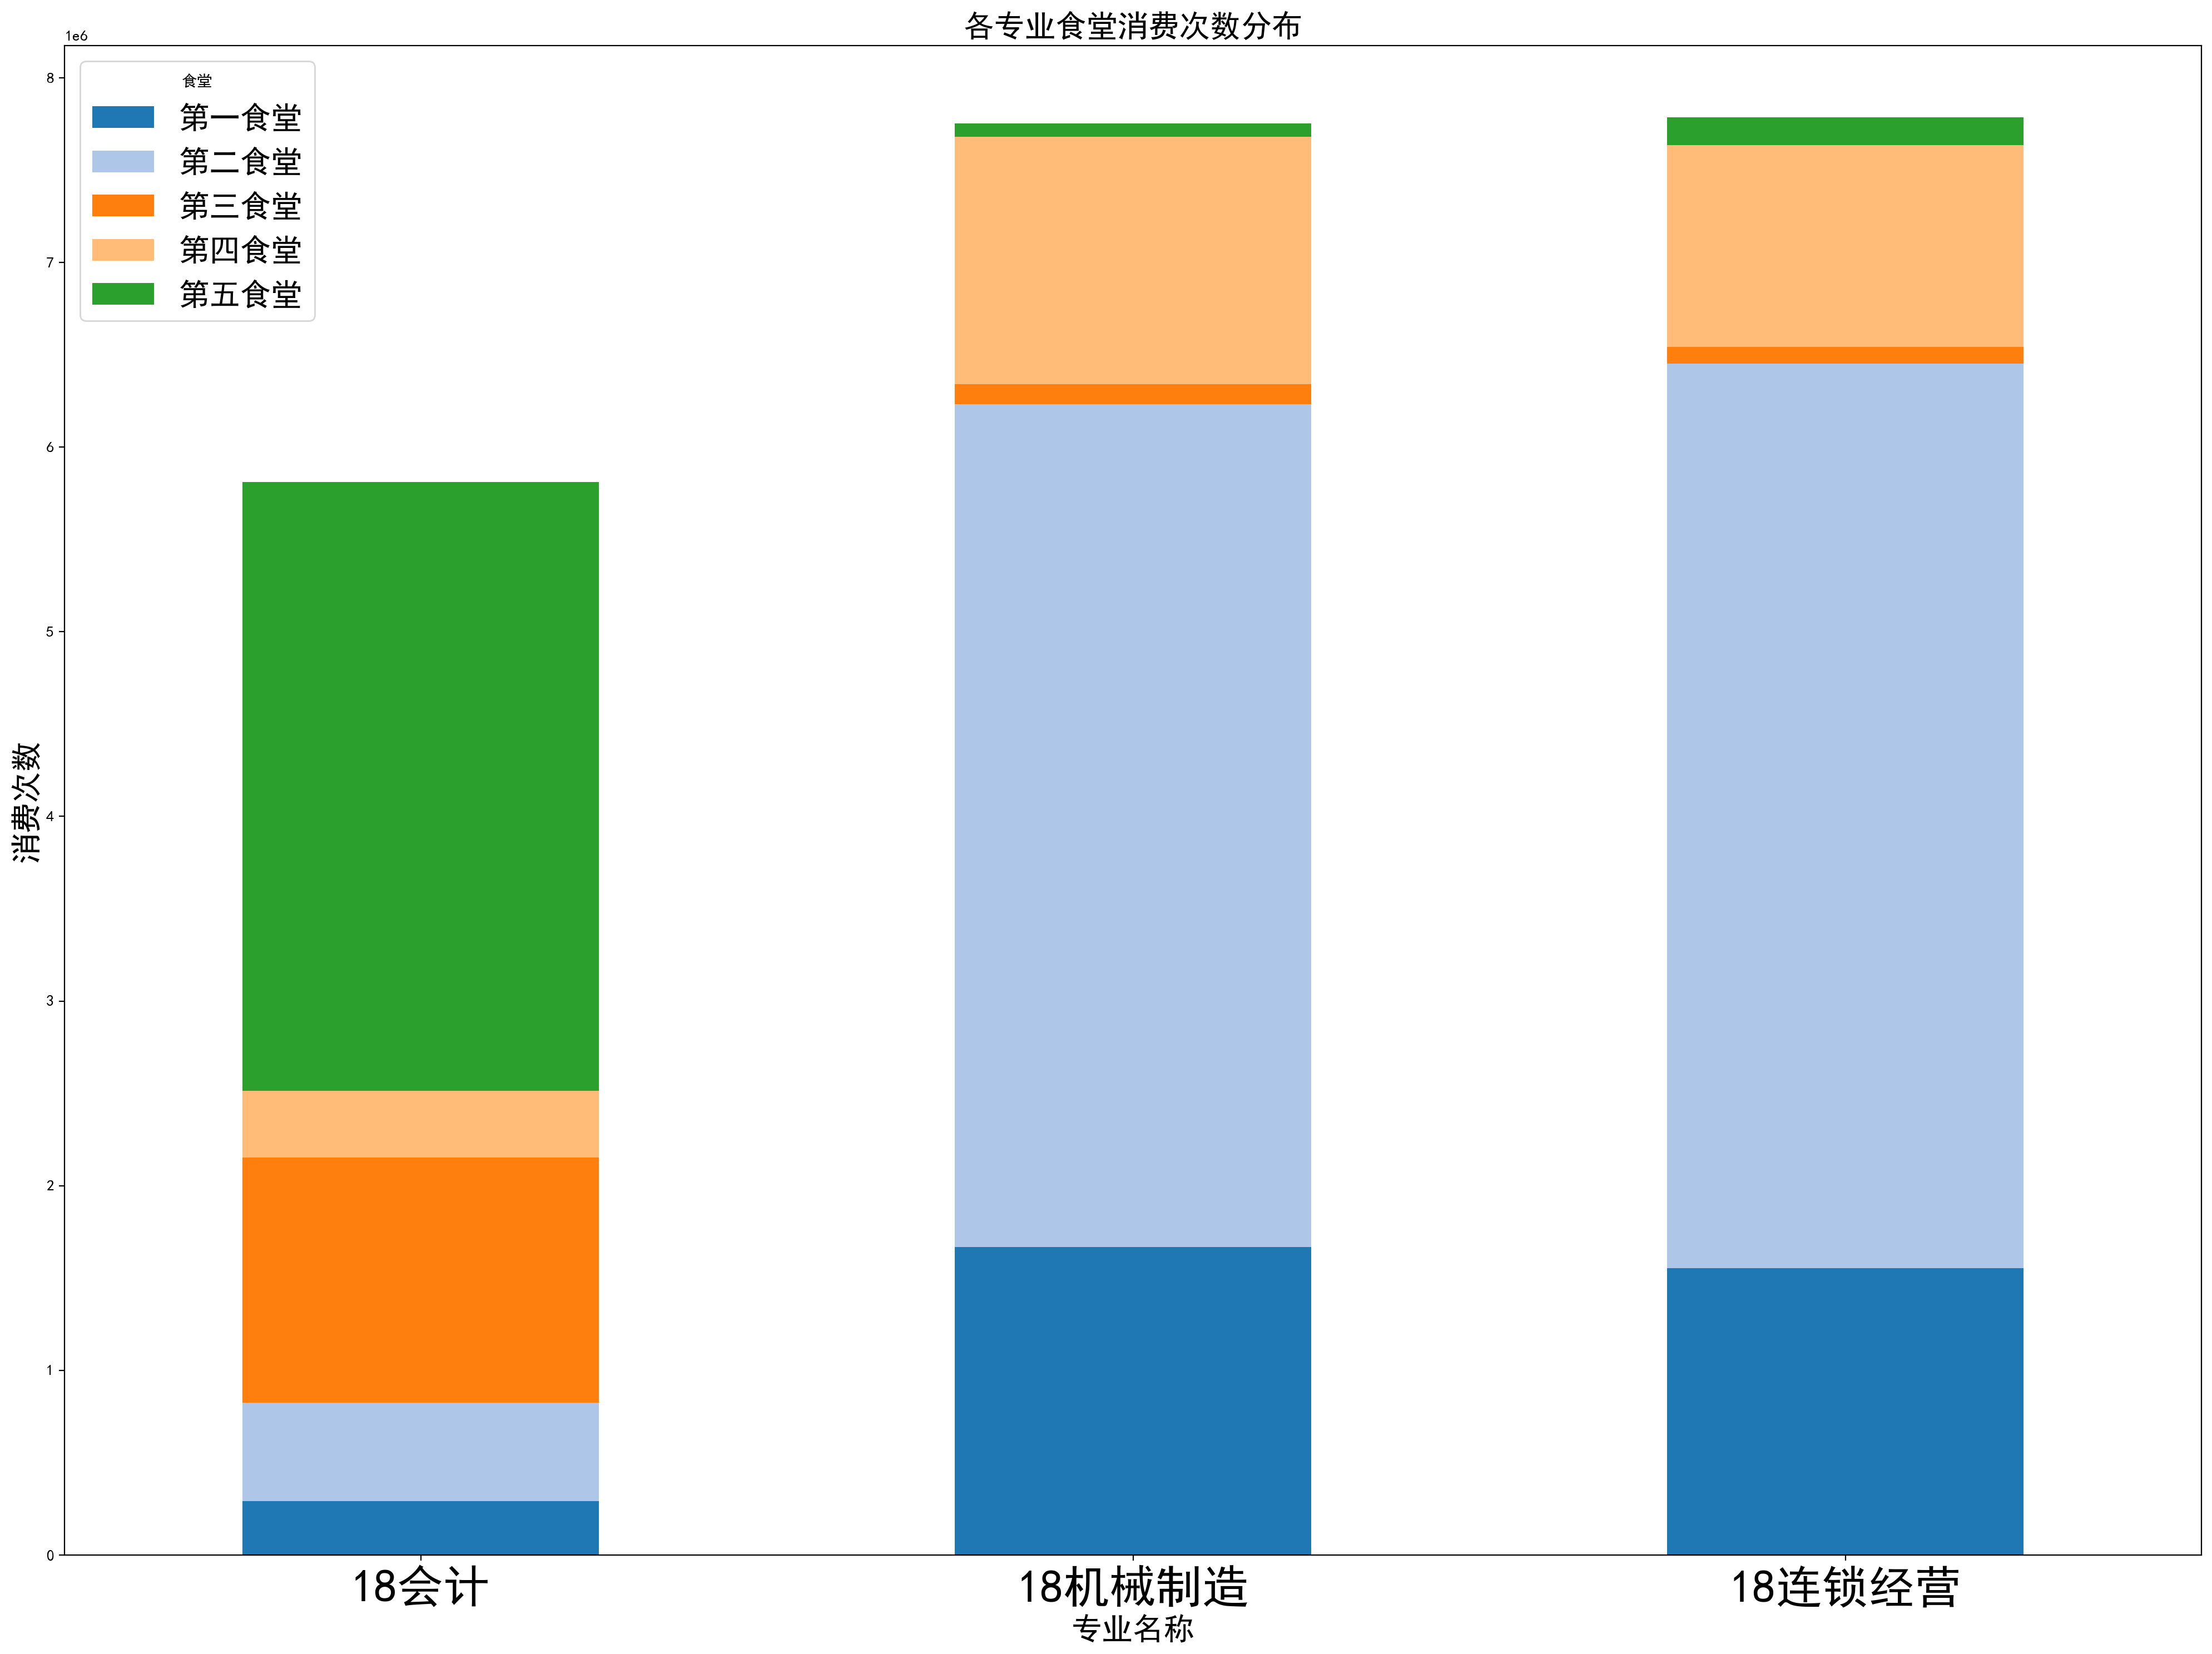

消费地点,第一食堂,第二食堂,第三食堂,第四食堂,第五食堂
专业名称,,,,,
18会计,290795.0,535108.0,1325543.0,362424.0,3297274.0
18机械制造,1668354.0,4565307.0,108389.0,1339793.0,69606.0
18连锁经营,1554913.0,4896595.0,90422.0,1094252.0,149089.0


In [9]:
# 创建透视表
canteen_counts = data_new.pivot_table(index='专业名称', columns='消费地点', values='消费次数', aggfunc='sum', fill_value=0)

# 筛选食堂1到食堂5的数据
canteen_counts = canteen_counts[['第一食堂', '第二食堂', '第三食堂', '第四食堂', '第五食堂']]

# 绘制堆叠柱状图
colors = plt.cm.tab20.colors[:5]  # 使用前5种颜色
canteen_counts.plot(kind='bar', stacked=True, figsize=(20, 15), color=colors)

# 设置标题和标签字体
plt.title('各专业食堂消费次数分布',fontsize=20)
plt.xlabel('专业名称',fontsize=20)
plt.ylabel('消费次数',fontsize=20)
plt.xticks(rotation=0,fontsize=30)  # 横轴标签不旋转
plt.legend(title='食堂',fontsize=20)  # 图例标题

# 显示图形
plt.tight_layout()  # 自动调整布局
plt.show()
canteen_counts

18机械制造和18连锁经营主要在第一食堂和第二食堂消费

18会计主要在第五食堂和第三食堂消费

### 1.1.3消费金额分布

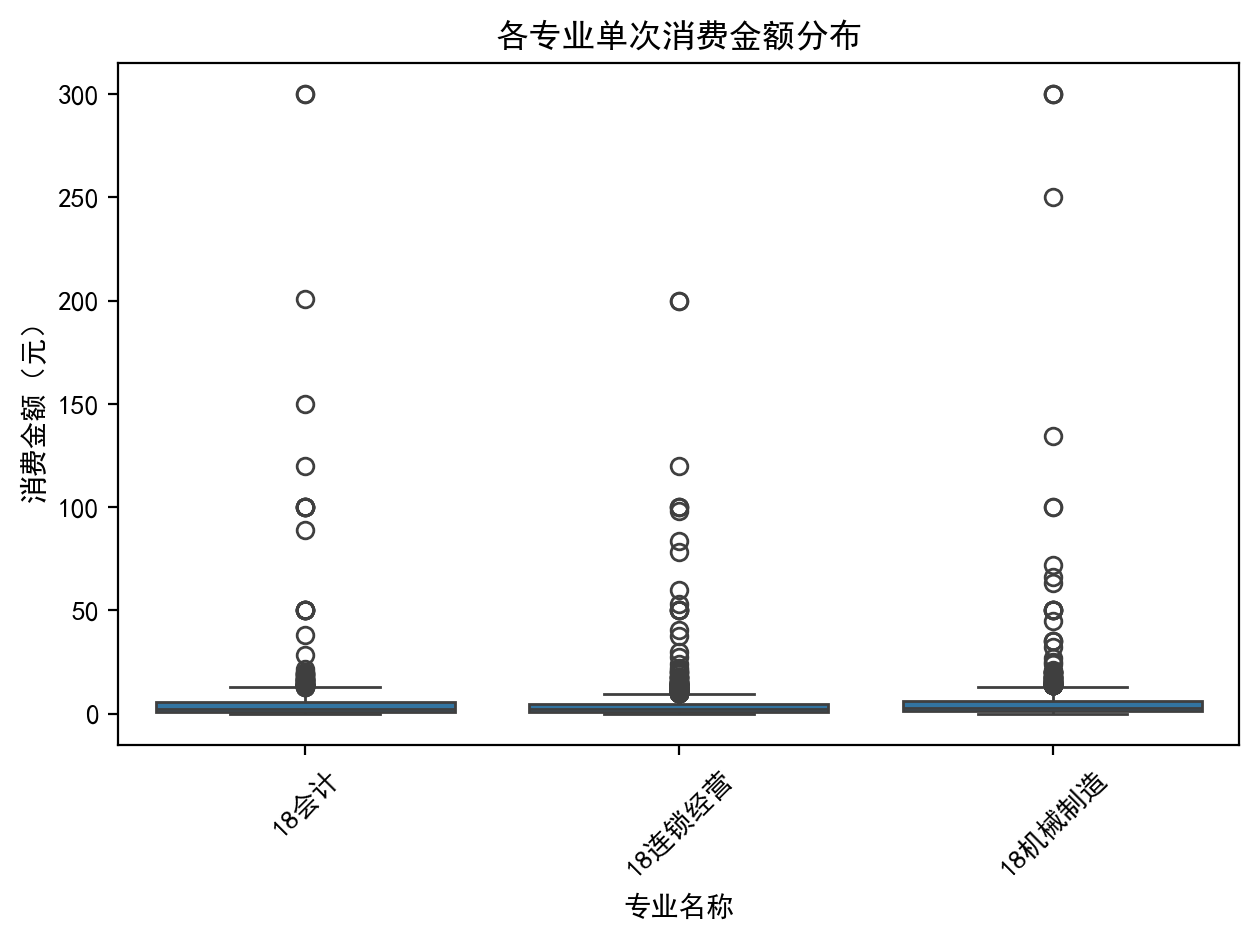

各专业消费金额的统计信息：


,最小值,第一四分位数,中位数,第三四分位数,最大值
专业名称,,,,,
18会计,0.0,0.6,2.5,5.5,300.0
18机械制造,0.0,1.2,3.0,6.0,300.0
18连锁经营,0.0,1.0,2.4,4.5,200.0


In [10]:
# 绘制箱线图
sns.boxplot(x='专业名称', y='消费金额', data=data_new)

# 设置标题和标签字体
plt.title('各专业单次消费金额分布')
plt.xlabel('专业名称')
plt.ylabel('消费金额（元）')

# 设置横轴标签的字体属性
plt.xticks(rotation=45)  # 如果标签过长，可以旋转45度

# 显示图形
plt.tight_layout()  # 自动调整布局
plt.show()
# 按专业名称分组，并计算消费金额的描述性统计
stats = data_new.groupby('专业名称')['消费金额'].describe(percentiles=[.25, .5, .75])

# 提取统计信息
stats = stats[['min', '25%', '50%', '75%', 'max']]
stats.columns = ['最小值', '第一四分位数', '中位数', '第三四分位数', '最大值']

# 打印结果
print("各专业消费金额的统计信息：")
stats

## 1.2不同专业性别差异消费

In [11]:
#分析每个专业，把不同性别的学生消费特点
data_male=data_new[data_new['性别']=='男']
data_female=data_new[data_new['性别']=='女']
data_male.head()

,序号,校园卡号,性别,专业名称,门禁卡号,流水号,校园卡编号,消费时间,消费金额,存储金额,余额,消费次数,消费类型,消费项目编码,操作编码,消费地点
3698,74,180074,男,18会计,19832682,117305353.0,201874.0,2019-04-21 16:10:00,0.0,100.0,115.9,734.0,存款,202.0,143.0,财务处
3699,74,180074,男,18会计,19832682,117330658.0,201874.0,2019-04-22 09:37:00,2.6,0.0,106.2,737.0,消费,114.0,8.0,第五食堂
3700,74,180074,男,18会计,19832682,117330659.0,201874.0,2019-04-22 09:38:00,2.1,0.0,104.1,738.0,消费,114.0,8.0,第五食堂
3701,74,180074,男,18会计,19832682,117338909.0,201874.0,2019-04-22 11:52:00,7.0,0.0,97.1,739.0,消费,175.0,247.0,第四食堂
3702,74,180074,男,18会计,19832682,117341779.0,201874.0,2019-04-21 16:13:00,6.5,0.0,108.8,736.0,消费,19.0,236.0,第一食堂


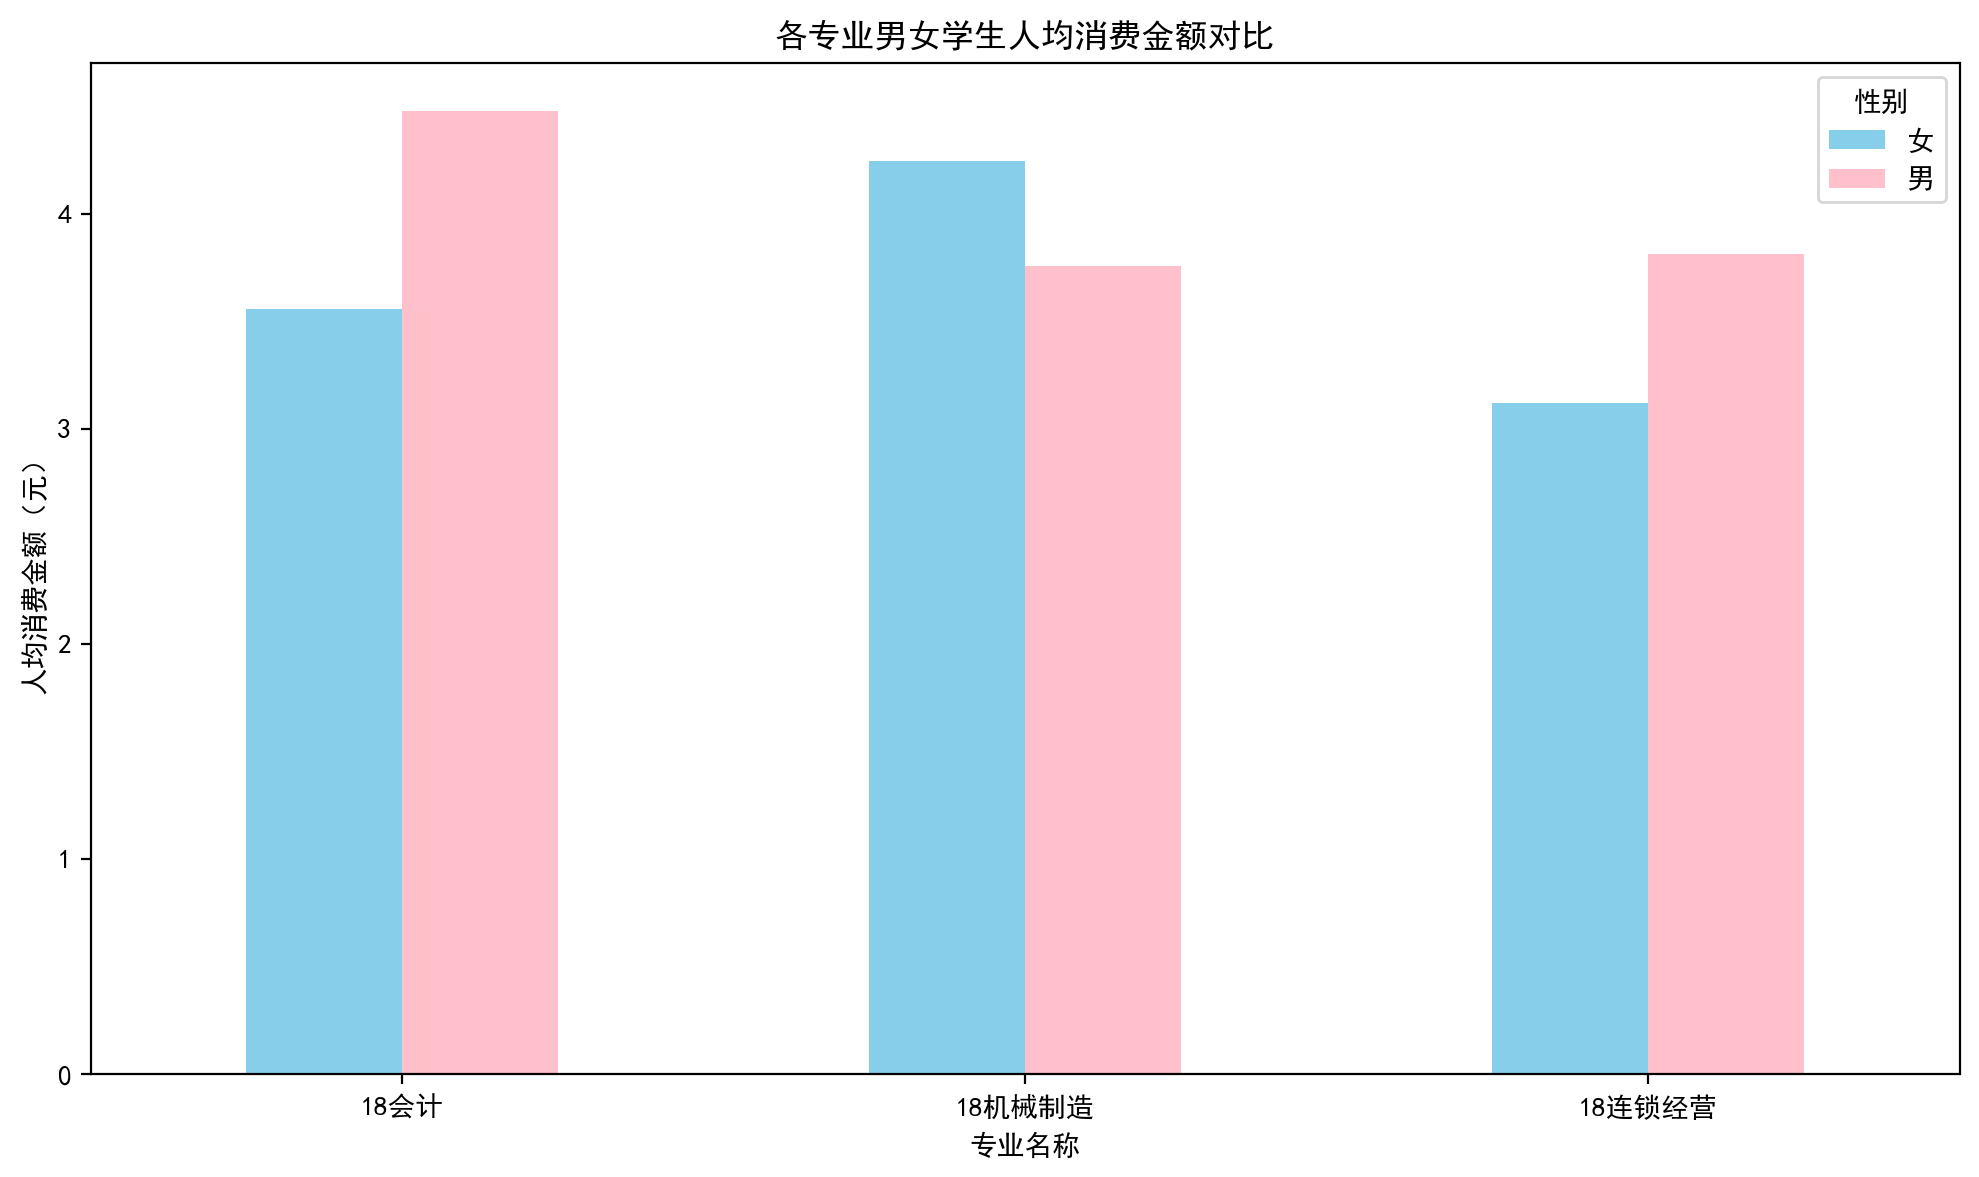

各专业男女消费金额的描述性统计：


,男_mean,男_median,男_std,女_mean,女_median,女_std
专业名称,,,,,,
18会计,4.479921,3.5,3.360713,3.558281,2.5,6.559410
18机械制造,3.757635,2.8,6.148381,4.245367,3.0,12.173894
18连锁经营,3.813137,3.0,3.234884,3.120192,2.0,4.720193


In [12]:
# 按专业分组，计算男女消费金额的描述性统计
male_stats = data_male.groupby('专业名称')['消费金额'].agg(['mean', 'median', 'std']).add_prefix('男_')
female_stats = data_female.groupby('专业名称')['消费金额'].agg(['mean', 'median', 'std']).add_prefix('女_')

# 合并男女统计数据
gender_major_stats = pd.concat([male_stats, female_stats], axis=1)

# 绘制柱状图：人均消费金额对比
gender_major = data_new.groupby(['专业名称', '性别'])['消费金额'].mean().unstack()
gender_major.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'pink'])

# 设置标题和标签字体
plt.title('各专业男女学生人均消费金额对比')
plt.xlabel('专业名称')
plt.ylabel('人均消费金额（元）')

# 设置横轴标签的旋转角度
plt.xticks(rotation=0)  # 如果标签过长，可以设置为45

# 添加图例
plt.legend(title='性别')

# 显示图形
plt.tight_layout()  # 自动调整布局
plt.show()
# 打印统计数据
print("各专业男女消费金额的描述性统计：")
gender_major_stats

**18会计**：男生人均(4.48)高于女生人均(3.56)消费，且女生消费标准差最大，可能存在高消费极端值

**18机械制造**：男生人均(3.76)低于女生人均(4.25)消费，且女生消费标准差极高，部分女生存在高消费

**18连锁经营**：男生人均(3.81)高于女生人均(3.12)消费，但是女生的消费更集中

### 聚类中心解读分析

#### **簇0**（最大群体1537）：

**性别**：明显偏向0类性别，即女生

**总消费金额**：均值为-0.4左右，低于整体的均值

**总消费次数**：均值为-0.3左右，低于整体的均值

**特征**：消费频率和消费金额较低，且女性占比较高。

#### **簇1**（高消费942）：
**性别**：性别特征接近平均值

**总消费金额**：均值为 1.09左右，显著高于整体均值

**总消费次数**：均值为 1.1左右，也显著高于整体均值

**特征**：可能是高金额、高频次消费的群体

#### **簇2**（最小群体807）：
**性别**：性别明显偏向1，即男生

**总消费金额**：均值为-0.49左右，显著低于整体均值

**总消费次数**：均值为-0.68左右，也显著低于整体均值

**特征**：消费活跃度低，男生占大多数

## 根据不同类别不同的食堂策略

类别0：设置消费满减活动推送，提升活跃度(消费频次)

类别1：推送高端的服务，或者更吸引人的营销手段(消费的潜力大)

类别2：进行消费习惯调研，根据调研情况具体分析，再针对分析